<a href="https://colab.research.google.com/github/DB11051998/gamereview-sentiment/blob/master/gamereview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive .mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path='/content/gdrive/My Drive/jantahack/NLP jantahack'

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
lis=[]
for dirname, _, filenames in os.walk(root_path):
    for filename in filenames:
        lis.append(os.path.join(dirname, filename))

In [7]:
lis

['/content/gdrive/My Drive/jantahack/NLP jantahack/test.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/train.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/game_overview.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/test_BppAoe0.zip',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/train_E52nqFa.zip',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/sample_submission_wgBqZCk.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._test.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._train.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._game_overview.csv']

In [0]:
df_train=pd.read_csv(lis[1])

In [9]:
df_train.head(10)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


In [10]:
df_train.shape

(17494, 5)

In [11]:
df_train.isna().any()

review_id          False
title              False
year                True
user_review        False
user_suggestion    False
dtype: bool

In [12]:
df_train[df_train.year.isna()]['title'].unique()

array(['Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'theHunter Classic',
       'Eternal Card Game', 'Bless Online', 'RaceRoom Racing Experience',
       'Fallout Shelter', 'Tactical Monsters Rumble Arena', 'Creativerse',
       'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'AdventureQuest 3D', 'Realm Grinder', 'Bloons TD Battles',
       'Cuisine Royale', 'EverQuest II'], dtype=object)

In [0]:
df_train.user_suggestion.value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

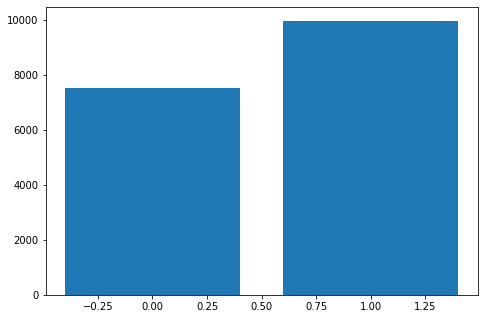

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_train.user_suggestion.unique(),df_train.user_suggestion.value_counts())
plt.show()

In [0]:
df_game_overview=pd.read_csv(lis[2])

In [14]:
len(df_train.title.unique())

44

In [15]:
df_train.user_review[8]

"Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your

In [0]:
#import library
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 


In [0]:
#no of words 
ls=[]
def no_of_words(df):
  return(ls.append(word_tokenize(df)))

In [19]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
df_train.user_review.apply(no_of_words)

LookupError: ignored

In [0]:
def preprocess(df):
  #lowercase all characters
  #remove all symbols
  #tokenize the sentence to words
  x=re.sub(r'[^\w]', ' ', df)
  word_tokenize1=word_tokenize(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x).lower())  
  #remove the stopwords
  filter1=[]
  for w in word_tokenize1: 
        if w not in stop_words: 
            filter1.append(w)
  filtered_full=np.array(filter1)
  return np.array(filtered_full)

In [0]:
filter1=[]
for w in word_tokenize(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x).lower()): 
      if w not in stop_words: 
          filter1.append(w)

In [0]:
y=df_train['user_review'].apply(preprocess)

In [54]:
y

0        [scared, hearing, creepy, voices, pause, momen...
1        [best, game, better, sam, pepper, youtube, acc...
2        [littly, iffy, controls, know, play, easy, mas...
3        [great, game, fun, colorful, side, note, thoug...
4        [many, games, cute, tag, right, next, horror, ...
                               ...                        
17489    [arguably, single, greatest, mmorp, exists, to...
17490    [older, game, sure, charm, holds, special, pla...
17491    [frist, started, playing, everquest, 2, amazin...
17492    [cool, game, thing, really, pisses, ridable, t...
17493    [game, since, little, kid, always, since, stil...
Name: user_review, Length: 17494, dtype: object

In [0]:
pd.read_csv('/content/gdrive/My Drive/jantahack/NLP jantahack/game_overview.csv').tags[0]

"['Horror', 'Free to Play', 'Cute', 'First-Person', 'Singleplayer', 'Psychological Horror', 'Indie', 'Adventure', 'Dark', 'Funny', 'Atmospheric', 'Action', 'Walking Simulator', 'Survival', 'Survival Horror', 'Anime', 'Gore', 'Comedy', 'Multiplayer', 'Illuminati']"

In [0]:
df_tokenize=pd.DataFrame(df_train,columns=['title'])

In [0]:
lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('rooms')) 

room


In [0]:
df_tokenize['tokenized']=y

In [0]:
df_tokenize

,title,tokenized
0,Spooky's Jump Scare Mansion,"[scared, hearing, creepy, voices, pause, momen..."
1,Spooky's Jump Scare Mansion,"[best, game, better, sam, pepper, youtube, acc..."
2,Spooky's Jump Scare Mansion,"[littly, iffy, controls, know, play, easy, mas..."
3,Spooky's Jump Scare Mansion,"[great, game, fun, colorful, side, note, thoug..."
4,Spooky's Jump Scare Mansion,"[many, games, cute, tag, right, next, horror, ..."
...,...,...
17489,EverQuest II,"[arguably, single, greatest, mmorp, exists, to..."
17490,EverQuest II,"[older, game, sure, charm, holds, special, pla..."
17491,EverQuest II,"[frist, started, playing, everquest, 2, amazin..."
17492,EverQuest II,"[cool, game, thing, really, pisses, ridable, t..."


In [0]:
def stemming(df):
  ls=[]
  ps = PorterStemmer()
  for w in df:
    ls.append(ps.stem(w))
  filtered_full=np.array(ls)
  return np.array(filtered_full)

In [0]:
z=df_tokenize.tokenized.apply(stemming)

In [0]:
z

0        [scare, hear, creepi, voic, paus, moment, writ...
1        [best, game, better, sam, pepper, youtub, acco...
2        [littli, iffi, control, know, play, easi, mast...
3        [great, game, fun, color, side, note, though, ...
4        [mani, game, cute, tag, right, next, horror, t...
                               ...                        
17489    [arguabl, singl, greatest, mmorp, exist, today...
17490    [older, game, sure, charm, hold, special, plac...
17491    [frist, start, play, everquest, 2, amaz, still...
17492    [cool, game, thing, realli, piss, ridabl, tran...
17493    [game, sinc, littl, kid, alway, sinc, still, r...
Name: tokenized, Length: 17494, dtype: object

In [0]:
ps = PorterStemmer() 
for w in y[8]: 
    print(w, " : ", ps.stem(w))

somewhere  :  somewhere
light  :  light
hearted  :  hearted
happy  :  happy
parody  :  parody
afraid  :  afraid
dark  :  dark
lies  :  lie
spooky  :  spooky
house  :  house
jump  :  jump
scares  :  scare
tasked  :  tasked
daunting  :  daunting
duty  :  duty
surviving  :  surviving
one  :  one
thousand  :  thousand
rooms  :  room
endless  :  endless
first  :  first
person  :  person
perspective  :  perspective
runner  :  runner
room  :  room
seconds  :  second
thanks  :  thanks
sprint  :  sprint
key  :  key
fact  :  fact
door  :  door
counts  :  count
new  :  new
room  :  room
even  :  even
one  :  one
thousand  :  thousand
rooms  :  room
still  :  still
feat  :  feat
tedium  :  tedium
needless  :  needle
repetition  :  repetition
still  :  still
things  :  thing
every  :  every
fifteen  :  fifteen
rooms  :  room
keep  :  keep
interest  :  interest
end  :  end
fifty  :  fifty
rooms  :  room
find  :  find
save  :  save
point  :  point
nothing  :  nothing
save  :  save
permanent  :  perma

In [0]:
words,count=np.unique(z[8], return_counts=True)

In [0]:
len(words)

295

In [0]:
dic={}
for i in range(len(words)):
  dic[words[i]]=count[i]

In [0]:
dic

{'350': 1,
 '3d': 1,
 '45': 1,
 'accept': 2,
 'accompani': 1,
 'across': 1,
 'act': 1,
 'adjac': 1,
 'ador': 1,
 'afraid': 1,
 'almost': 2,
 'alreadi': 1,
 'ambient': 1,
 'amount': 1,
 'anoth': 6,
 'anyth': 1,
 'area': 1,
 'asylum': 1,
 'avoid': 1,
 'away': 1,
 'balanc': 1,
 'begin': 1,
 'behind': 2,
 'best': 1,
 'beyond': 1,
 'big': 1,
 'black': 1,
 'box': 2,
 'break': 1,
 'bright': 1,
 'bring': 1,
 'budget': 1,
 'calm': 1,
 'cardboard': 3,
 'cartoon': 1,
 'catch': 1,
 'ceil': 1,
 'chanc': 1,
 'chang': 1,
 'charm': 2,
 'chase': 2,
 'chasm': 1,
 'cheap': 1,
 'chill': 1,
 'chime': 1,
 'chipper': 1,
 'clean': 1,
 'coat': 1,
 'coffe': 1,
 'combin': 1,
 'come': 1,
 'comput': 1,
 'corner': 1,
 'correct': 1,
 'corridor': 2,
 'could': 1,
 'count': 1,
 'creatur': 3,
 'crescendo': 1,
 'cutout': 3,
 'dank': 1,
 'dark': 3,
 'darker': 1,
 'daunt': 1,
 'dead': 1,
 'death': 1,
 'deeper': 1,
 'delv': 1,
 'depart': 1,
 'deplet': 1,
 'differ': 1,
 'difficult': 1,
 'divers': 2,
 'door': 5,
 'dread': 3,


In [0]:
print(df_train.iloc[8].user_review)

Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your 

other way approach

In [0]:
from textblob import TextBlob

In [0]:
df_pos=df_train[df_train['user_suggestion']==1]['user_review']
df_neg=df_train[df_train['user_suggestion']==0]['user_review']

In [42]:
TextBlob("  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.").sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

In [27]:
df_pos[0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [0]:
def sent_tok(df):
  return(sent_tokenize(df))

In [0]:
y=df_pos.apply(sent_tok)

In [29]:
nltk.download('punkt')
from tqdm import tqdm_notebook as tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
'''def sent_ana(df):
  length=len(df)
  sent_pol=0
  sent_sub=0
  for x in tqdm(df):
    sent_pol+=TextBlob(x).sentiment.polarity
    sent_sub+=TextBlob(x).sentiment.subjectivity
  sent_pol=sent_pol/length
  sent_sub=sent_sub/length
  return(sent_pol,sent_sub)'''


'def sent_ana(df):\n  length=len(df)\n  sent_pol=0\n  sent_sub=0\n  for x in tqdm(df):\n    sent_pol+=TextBlob(x).sentiment.polarity\n    sent_sub+=TextBlob(x).sentiment.subjectivity\n  sent_pol=sent_pol/length\n  sent_sub=sent_sub/length\n  return(sent_pol,sent_sub)'

In [46]:
df_pos

0        I'm scared and hearing creepy voices.  So I'll...
1        Best game, more better than Sam Pepper's YouTu...
2        A littly iffy on the controls, but once you kn...
3        Great game, fun and colorful and all that.A si...
4        Not many games have the cute tag right next to...
                               ...                        
17489    Arguably the single greatest mmorp that exists...
17490    An older game, to be sure, but has its own cha...
17491    When I frist started playing Everquest 2 it wa...
17492    cool game. THe only thing that REALLY PISSES M...
17493    this game since I was a little kid, always hav...
Name: user_review, Length: 9968, dtype: object

In [0]:
def sent_ana(df):
  sentiment=TextBlob(df).sentiment.polarity
  return(sentiment)


In [0]:
## from the above method we found the wrong analysis

In [0]:
y=df_pos.apply(preprocess)

In [62]:
z=y.apply(stemming)
z

0        [scare, hear, creepi, voic, paus, moment, writ...
1        [best, game, better, sam, pepper, youtub, acco...
2        [littli, iffi, control, know, play, easi, mast...
3        [great, game, fun, color, side, note, though, ...
4        [mani, game, cute, tag, right, next, horror, t...
                               ...                        
17489    [arguabl, singl, greatest, mmorp, exist, today...
17490    [older, game, sure, charm, hold, special, plac...
17491    [frist, start, play, everquest, 2, amaz, still...
17492    [cool, game, thing, realli, piss, ridabl, tran...
17493    [game, sinc, littl, kid, alway, sinc, still, r...
Name: user_review, Length: 9968, dtype: object

array(['scare', 'hear', 'creepi', 'voic', 'paus', 'moment', 'write',
       'review', 'wait', 'heart', 'beat', 'return', 'atleast', 'somewhat',
       'calmer', 'time', 'game', 'ador', 'creepi', 'like', 'happi',
       'tree', 'friend', 'graphic', 'sceme', 'childhood', 'bubbl',
       'clean', 'hello', '1990', 'charact', 'isnot', 'tri', 'kill',
       'likabl', 'bit', 'odd', 'noob', 'thing', 'though', 'oh', 'look',
       'class', 'room', 'full', 'ghost', 'dead', 'children', 'let',
       'shine', 'flashlight', 'stand', 'stare', 'hmm', 'creepi', 'music',
       'turn', 'around', 'see', 'see', 'chase', 'never', 'game', 'afraid',
       'find', 'lock', 'door'], dtype='<U10')

N-Gram

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(stop_words='english',analyzer=stemmed_words)
print(stem_vectorizer.fit_transform(df_pos))
print(stem_vectorizer.get_feature_names())

  (0, 21252)	1
  (0, 2382)	7
  (0, 11738)	1
  (0, 6256)	3
  (0, 26140)	1
  (0, 22370)	1
  (0, 14375)	2
  (0, 17668)	1
  (0, 9754)	2
  (0, 15785)	1
  (0, 26981)	1
  (0, 20150)	1
  (0, 26596)	1
  (0, 26260)	1
  (0, 16134)	4
  (0, 11742)	1
  (0, 3558)	1
  (0, 24592)	3
  (0, 20128)	1
  (0, 2967)	1
  (0, 22472)	1
  (0, 4619)	1
  (0, 24500)	1
  (0, 24295)	2
  (0, 10324)	2
  :	:
  (9967, 9559)	1
  (9967, 3240)	1
  (9967, 22014)	2
  (9967, 23119)	1
  (9967, 14357)	1
  (9967, 24664)	1
  (9967, 24374)	1
  (9967, 26713)	1
  (9967, 2257)	1
  (9967, 16189)	1
  (9967, 21447)	1
  (9967, 16645)	1
  (9967, 8765)	1
  (9967, 13684)	1
  (9967, 23565)	1
  (9967, 14244)	1
  (9967, 2526)	1
  (9967, 5994)	1
  (9967, 27151)	2
  (9967, 6660)	1
  (9967, 14444)	1
  (9967, 19914)	1
  (9967, 14385)	1
  (9967, 8123)	1
  (9967, 27400)	1


In [68]:
print(stem_vectorizer.get_feature_names())

['00', '000', '00001', '0001', '0002', '000a65ba', '000hr', '000th', '001', '008', '00gbsystem', '00th', '01', '02', '0263', '03', '033fdcd0', '04', '040', '04vivbpkej', '05', '056716ehepk', '06', '07', '07b4sbjlpzk', '08', '0815', '09', '0900', '09_135008', '0a', '0a9e', '0a9e372d3b4ad19135b953a78882e789', '0a9e372d3b4ad19135b953a78882e789read', '0box', '0but', '0death', '0enjoy', '0final', '0funfactor', '0i', '0last', '0physic', '0s', '0soundfx', '0ther', '0threat', '0ti', '0time', '0x0409if', '10', '100', '1000', '10000', '1000000', '10000000', '100000000000000', '100000000000000000000000000', '100000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '100000000x', '10000x', '100050352405802439683409654', '1000em', '1000gun', '1000h', '1000m', '1000th', '1000x', '1001', '1004', '100addict', '100hour', '100hr', '100i', '100join', '100

In [70]:
''' after stemming i got to know it has characters from other languages
    task:-remove the numbers and noises present(like:-aaaaa,aaaaaas,ssss)
          check no of doc of other languages
          properly stemming
          form the feature vectors depending upon the maxm use of words(frquency/count based)'''
      

' after stemming i got to know it has characters from other languages\n    task:-remove the numbers and noises present(like:-aaaaa,aaaaaas,ssss)\n          check no of doc of other languages\n          properly stemming\n          form the feature vectors depending upon the maxm use of words(frquency/count based)'